<a href="https://colab.research.google.com/github/victorgtrrz/titanic_survival_estimator/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Linear regresion example: Titanic survivors</h1>
<br/>

The numpy (linear algebra) and pandas (data visualization) are imported to help in the creation of the model

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf

In the following cell, the datasets for training and test are imported. It's important to not do the testing with the same parameters the model was trained with, that would led to an unfair evaluation of the model throughput because it already know the true values

Also, by using the .pop() function we're detaching the solition column (wheter the passanger survived or not) from the whole dataset, and storing it in another variable called y_train (or y_data)

In [ ]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

With the method .head() we can see a preview for the 5 first examples (by default) of the dataset

In [ ]:
display(dftrain.head(10))


display(y_train.to_frame(name='Survived?').head(10))


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
5,male,2.0,3,1,21.0750,Third,unknown,Southampton,n
6,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
7,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n
8,female,4.0,1,1,16.7000,Third,G,Southampton,n
9,male,20.0,0,0,8.0500,Third,unknown,Southampton,y


,Survived?
0,0
1,1
2,1
3,1
4,0
5,0
6,1
7,1
8,1
9,0


Doing this allow to see a specific column of the dataset

In [ ]:
#dftrain['class'] serves the same purpose, the other notation . sometimes it does not work for me
"""you can also
comment several
lines this way
"""

dftrain.age

0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64

To see an especific entry for the dataset, use this syntax

In [ ]:
dftrain.loc[100]

sex                          male
age                          20.0
n_siblings_spouses              0
parch                           0
fare                         7.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 100, dtype: object

Did the passenger survived?

In [ ]:
if y_train.loc[100] == 0:
    print('The passenger did not survive')
else:
    print('The passenger survived')

The passenger did not survive


In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
rows, columns = dftrain.shape
print(f'The dataset contains {rows} rows and {columns} columns')

The dataset contains 627 rows and 9 columns


<Axes: >

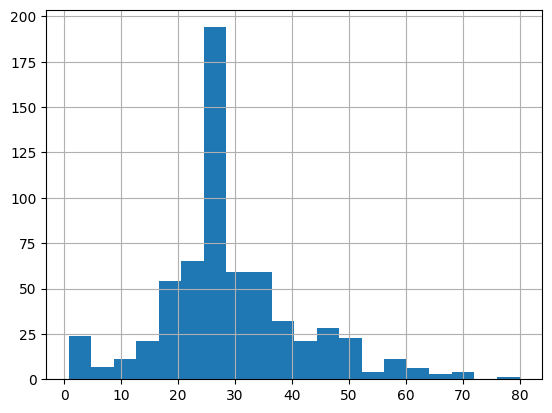

In [ ]:
dftrain.age.hist(bins=20)

<Axes: >

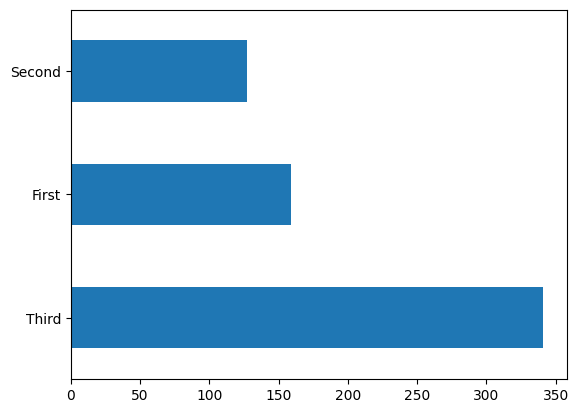

In [ ]:
dftrain['class'].value_counts().plot(kind='barh')

<Axes: >

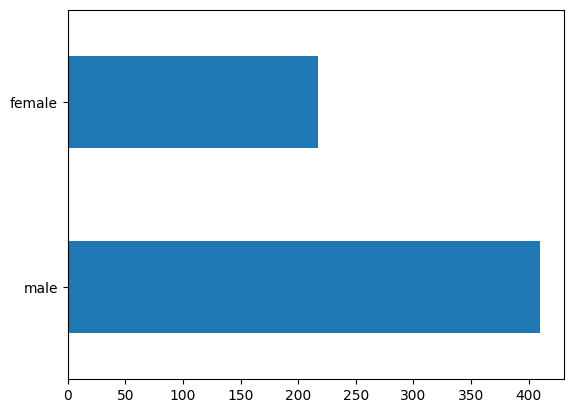

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')

Text(0.5, 0, '% survived')

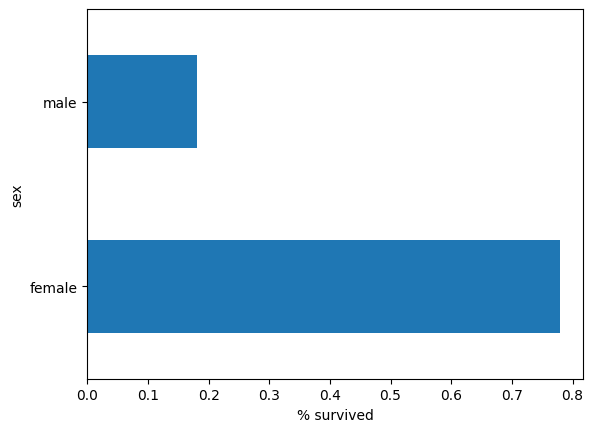

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survived')

Doing this data visualization stuff is not neccesary but help us build some intuition about the data. For the moment we can grasp the following;
<ol>
    <li>The majority of passengers are in their 20's or their 30's</li>
    <li>The majority of passengers are male</li>
    <li>The majority of passengers are in 'Third' class</li>
    <li>Females have a much higher chance of survival</li>
</ol>
Data which is not <strong>numerical</strong> (defined by numbers), is called <strong>categorical</strong> (sex, class, deck, etc.)

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique() #This line creates a list of all the unique values from given feature column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))



Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
